In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Частина третя: Аналіз датасет c Kaggle.com

In [2]:
df = pd.read_csv("/content/bestsellers with categories.csv")

In [3]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
df.shape

(550, 7)

* Про скільки книг зберігає дані датасет? Відповідь: 550 книг

In [9]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [10]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

## Первинне дослідження даних
* Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [11]:
df.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? Відповідь: ні

* Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [12]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри? Відповідь: Non Fiction, Fiction

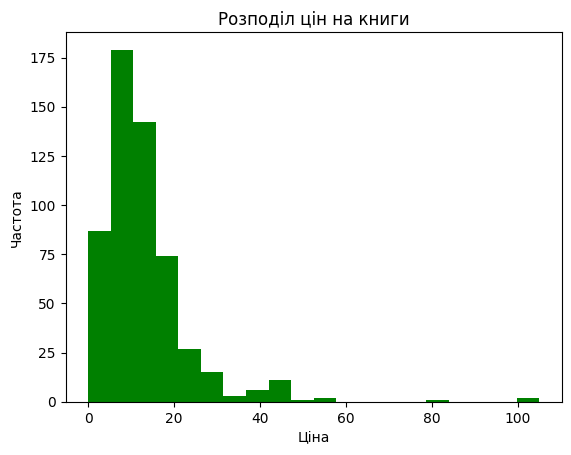

In [16]:
plt.hist(df['price'], bins=20, color='green')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Розподіл цін на книги')
plt.show()

In [17]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print('Максимальна ціна:', max_price)
print('Мінімальна ціна:', min_price)
print('Середня ціна:', mean_price)
print('Медіанна ціна:', median_price)

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


Максимальна ціна? Відповідь: 105

Мінімальна ціна? Відповідь: 0

Середня ціна? Відповідь: 13.1

Медіанна ціна? Відповідь: 11.0

## Пошук та сортування даних

In [18]:
df['user_rating'].max()

4.9

Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [25]:
df['user_rating'].value_counts()[4.9]

52

Скільки книг мають такий рейтинг? Відповідь: 52

In [34]:
df.loc[df['reviews'].idxmax()]['name']

'Where the Crawdads Sing'

Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing

In [41]:
df['name'][df.loc[df['year'] == 2015]['price'].idxmax()]

'Publication Manual of the American Psychological Association, 6th Edition'

* З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychological Association, 6th Edition

In [45]:
(df.loc[df['year'] == 2010]['genre'] == 'Fiction').sum()

20

In [49]:
((df['year'] == 2010) & (df['genre'] == 'Fiction')).sum()

20

* Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [57]:
df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]

1

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

In [66]:
df_sort = df.loc[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
df_sort

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


* І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [70]:
df_sort.tail(1)['name']

253    Old School (Diary of a Wimpy Kid #10)
Name: name, dtype: object

* Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

## Агрегування даних та з'єднання таблиць
Остання секція цього домашнього завдання включає просунутіші функції. Але не хвилюйтеся, pandas робить усі операції простими та зрозумілими.

* Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [84]:
df.groupby('genre')[['price']].agg(['min', 'max'])

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

Максимальна ціна для жанру Fiction: Відповідь: 82

Мінімальна ціна для жанру Fiction: Відповідь: 0

Максимальна ціна для жанру Non Fiction: Відповідь: 105

Мінімальна ціна для жанру Non Fiction: Відповідь: 0

* Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [94]:
df_a = df.groupby('author').agg({'name': 'count'}).rename(columns={'name': 'book_count'})
df_a.head(4)

,book_count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1


In [95]:
df_a.shape

(248, 1)

In [108]:
df_a.idxmax()[0]

'Jeff Kinney'

In [114]:
df_a.loc['Jeff Kinney']

book_count    12
Name: Jeff Kinney, dtype: int64

Якої розмірності вийшла таблиця? Відповідь: 248 Authors, (248, 1)

Який автор має найбільше книг? Відповідь: Jeff Kinney

Скільки книг цього автора? Відповідь: 12


* Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [117]:
df_mean = df.groupby('author').agg({'user_rating': 'mean'})
df_mean.head(4)

,user_rating
author,
Abraham Verghese,4.6
Adam Gasiewski,4.4
Adam Mansbach,4.8
Adir Levy,4.8


In [129]:
df_mean['user_rating'].idxmin()

'Donna Tartt'

In [130]:
df_mean.loc['Donna Tartt']

user_rating    3.9
Name: Donna Tartt, dtype: float64

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt

Який у цього автора середній рейтинг? Відповідь: 3.9

* З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [135]:
df_3 = pd.concat([df_a, df_mean], axis=1)
df_3.head(4)

,book_count,user_rating
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8


* Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [137]:
df_3.sort_values(by=['book_count', 'user_rating'])

,book_count,user_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Який автор перший у списку? Відповідь: Muriel Barbery

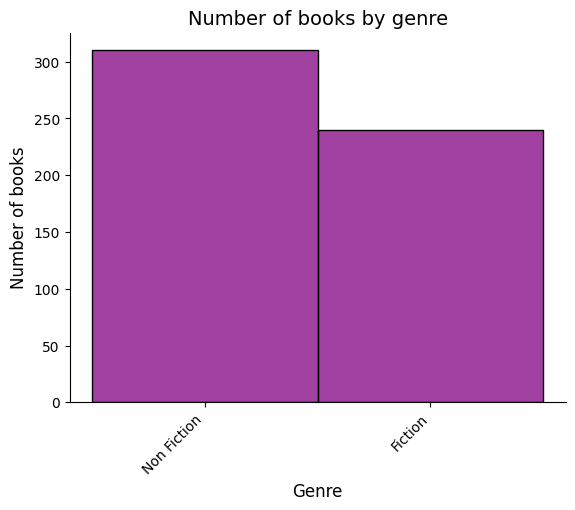

In [138]:
sns.histplot(data=df, x='genre', bins=10, color='purple')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of books', fontsize=12)
plt.title('Number of books by genre', fontsize=14)
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.show()

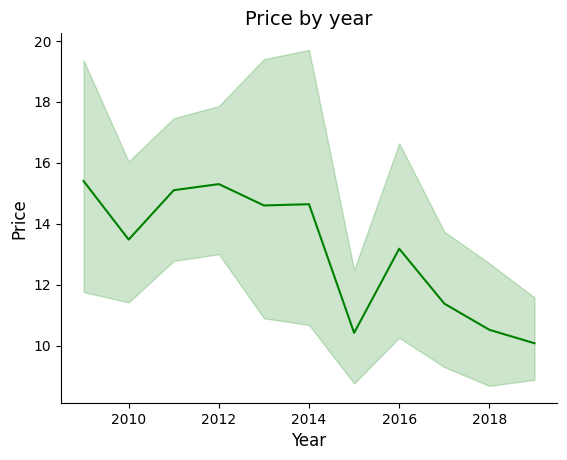

In [139]:
sns.lineplot(data=df, x='year', y='price', color='green')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price by year', fontsize=14)
sns.despine()
plt.show()

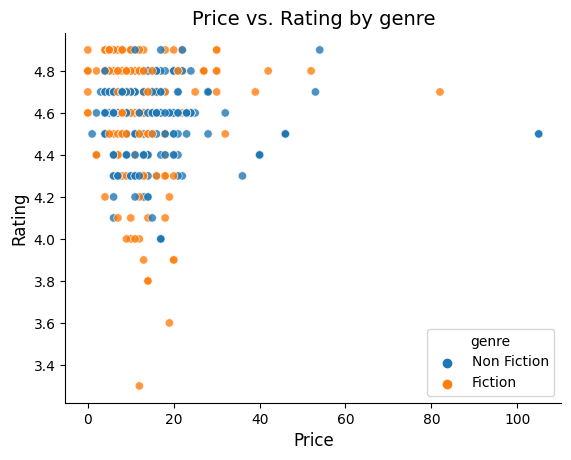

In [141]:
sns.scatterplot(data=df, x='price', y='user_rating', hue='genre', alpha=0.8)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Price vs. Rating by genre', fontsize=14)
sns.despine()
plt.show()

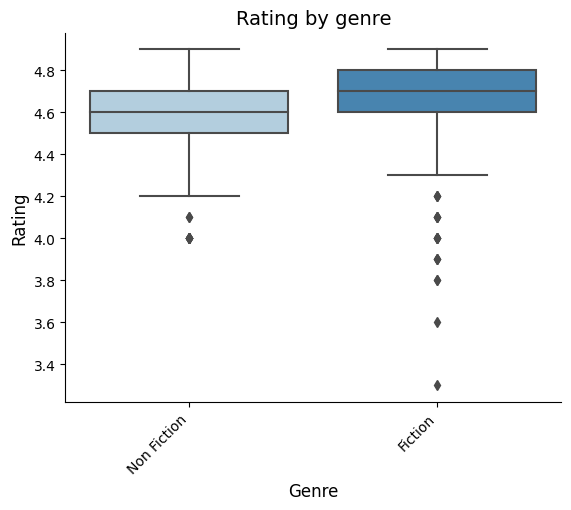

In [143]:
sns.boxplot(data=df, x='genre', y='user_rating', palette='Blues')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Rating by genre', fontsize=14)
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.show()

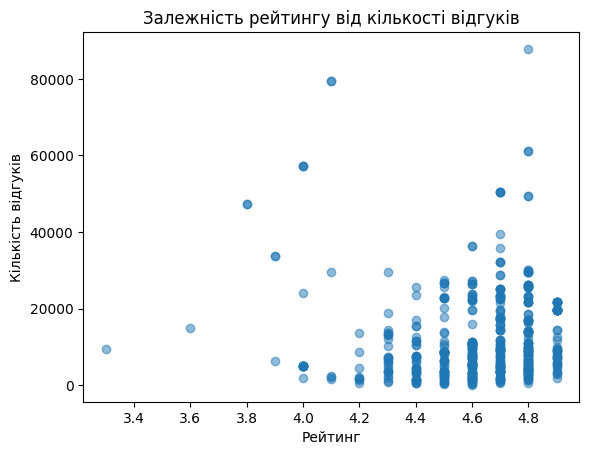

In [151]:
plt.scatter(df['user_rating'], df['reviews'], alpha=0.5)
plt.title('Залежність рейтингу від кількості відгуків')
plt.ylabel('Кількість відгуків')
plt.xlabel('Рейтинг')
plt.show()